# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [43]:
def display(images, labels, axis='off', cmap=None, figsize=(15,10)):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=figsize)
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

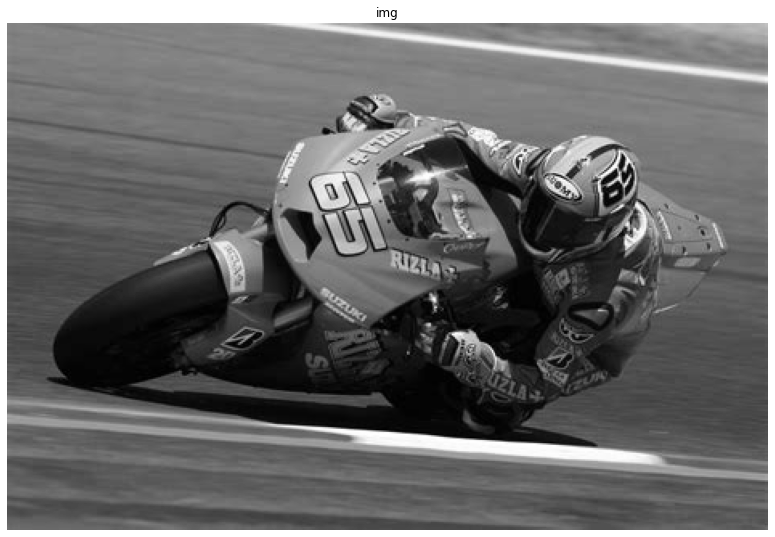

In [44]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/motogp.jpeg'), cv2.COLOR_BGR2GRAY)

display([img],['img'], cmap='gray', figsize=(30,10))

## 2.1 Watermark Insertion

In [45]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )


def dct(img, block_size=8):
    
    dct = np.zeros(img.shape)

    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])
            
    return dct

In [46]:
def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')        
        
def idct(img_dct, block_size=8):
    
    img = np.zeros(img_dct.shape)
    
    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            img[i:(i + block_size), j:(j + block_size)] = idct2( img_dct[i:(i + block_size),j:(j + block_size)])
    
    return img

In [47]:
def apply_threshold(img_dct, threshold):
    
    return img_dct * (abs(img_dct) > (threshold * np.max(img_dct)))
    

In [87]:
def filter_k(block, k):
    """ Return the K (absolute) largest values in the same location as found in the block """
    oput = np.zeros(block.shape)
    block_abs = np.abs(block)
    
    for i in range(k):
        r, c = np.unravel_index(np.argmax(block_abs, axis=None), block_abs.shape)
        oput[r,c] = block[r,c]
        block_abs[r,c] = 0;
        
    return oput
        
def filter_k_highest(img_dct, k, block_size=8):
    oput = np.zeros(img_dct.shape)
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            oput[i:(i + block_size), j:(j + block_size)] = filter_k(img_dct[i:(i + block_size),j:(j + block_size)], k)
    
    return oput

### 2.1.1 - Compute the 2-D DCT

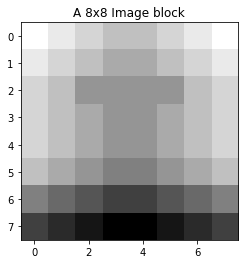

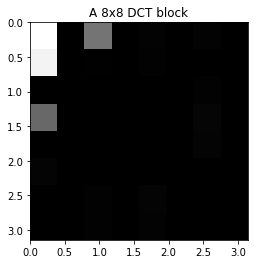

In [51]:
pos = 0
block_size=8

img_dct = dct(img)

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block");

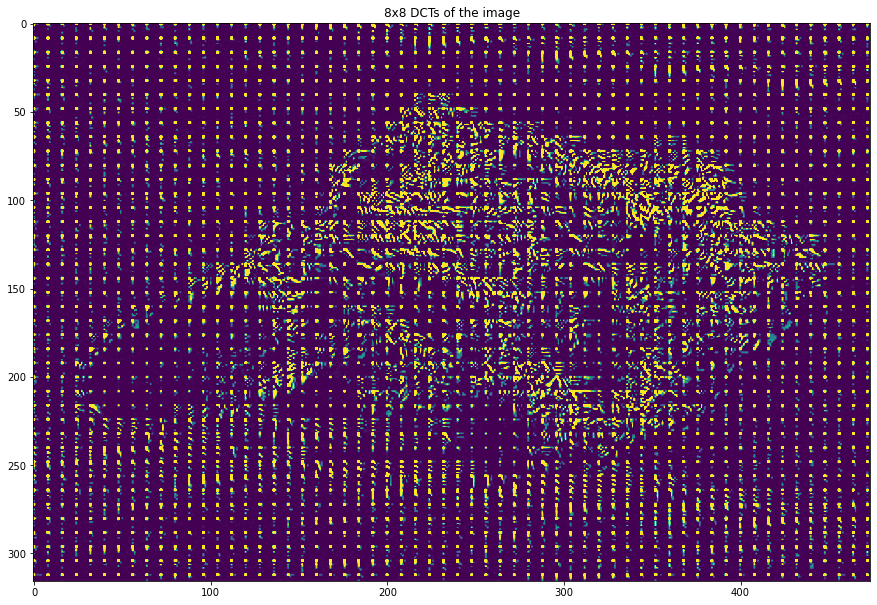

In [8]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(img_dct, vmax = np.max(img_dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image");

### 2.1.2 - Choose the $K$ Largest Coeficients 

In [9]:
x = [x * 0.0005 for x in range(1, 50)]
thresholds = {}
coeficients = {}

for key in x:
    thresholds[key] = apply_threshold(img_dct, key)
    coeficients[key] = 100 * np.sum(thresholds[key] != 0.0 ) / (img.shape[0] * img.shape[1] * 1.0)
    
# keys = list(thresholds.keys())
# imgs = list(thresholds.values())
# display(imgs, keys, cmap='gray', figsize=(15,25))

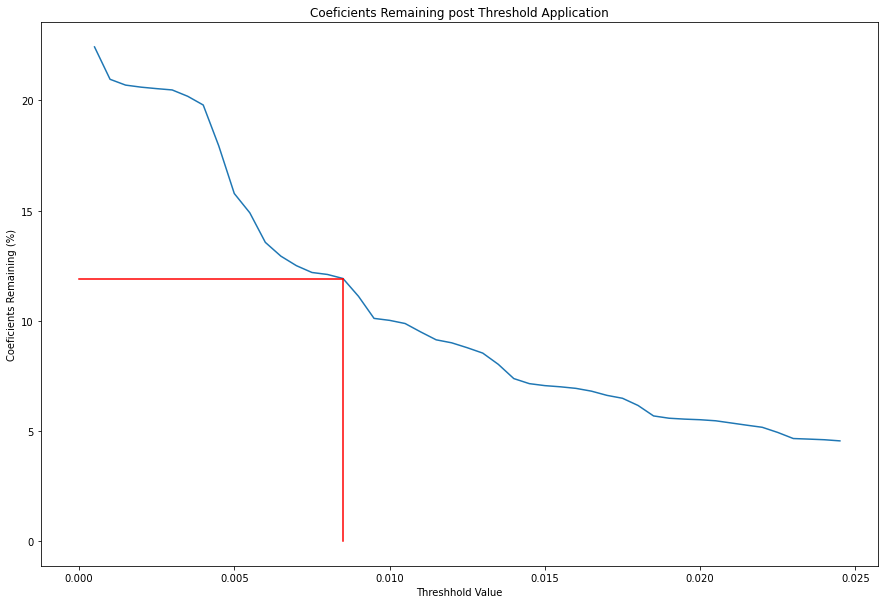

In [10]:
plt.figure(figsize=(15,10))
plt.plot(list(coeficients.keys()), list(coeficients.values()))
plt.plot([0.0085, 0.0085],[0, 11.9], 'r')
plt.plot([0, 0.0085],[11.9, 11.9], 'r')
plt.title('Coeficients Remaining post Threshold Application')
plt.xlabel('Threshhold Value')
plt.ylabel('Coeficients Remaining (%)');

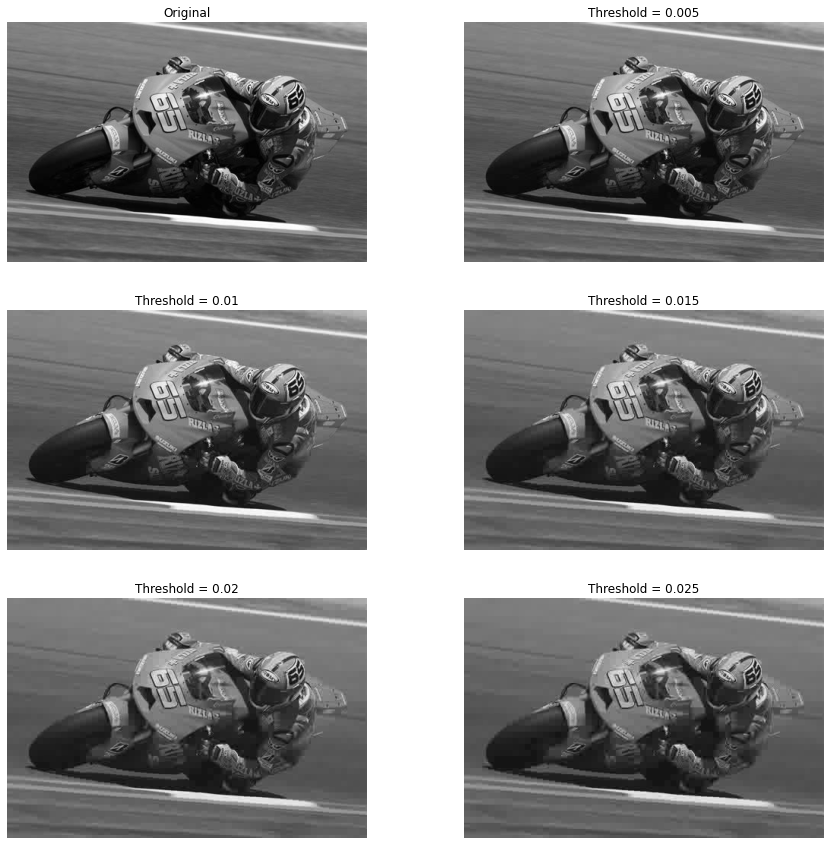

In [11]:
transformed = idct(apply_threshold(img_dct, 0.001))

display([img, 
         idct(apply_threshold(img_dct, 0.005)),
         idct(apply_threshold(img_dct, 0.01)),
         idct(apply_threshold(img_dct, 0.015)),
         idct(apply_threshold(img_dct, 0.02)),
         idct(apply_threshold(img_dct, 0.025))],
        ['Original',
         'Threshold = 0.005',
         'Threshold = 0.01',
         'Threshold = 0.015',
         'Threshold = 0.02',
         'Threshold = 0.025'],
        figsize=(15,15),
        cmap='gray')

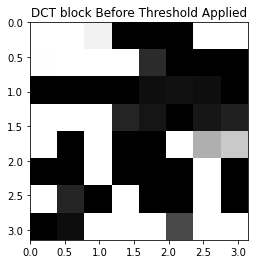

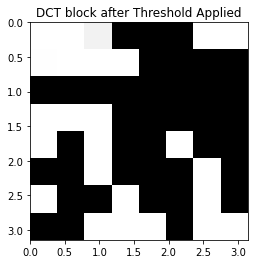

In [12]:
x_pos = 100
y_pos = 200
block_size=8

img_dct = dct(img)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])
plt.title(f"DCT block Before Threshold Applied");

img_dct_t = apply_threshold(img_dct, 0.0085)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct_t[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"DCT block after Threshold Applied");

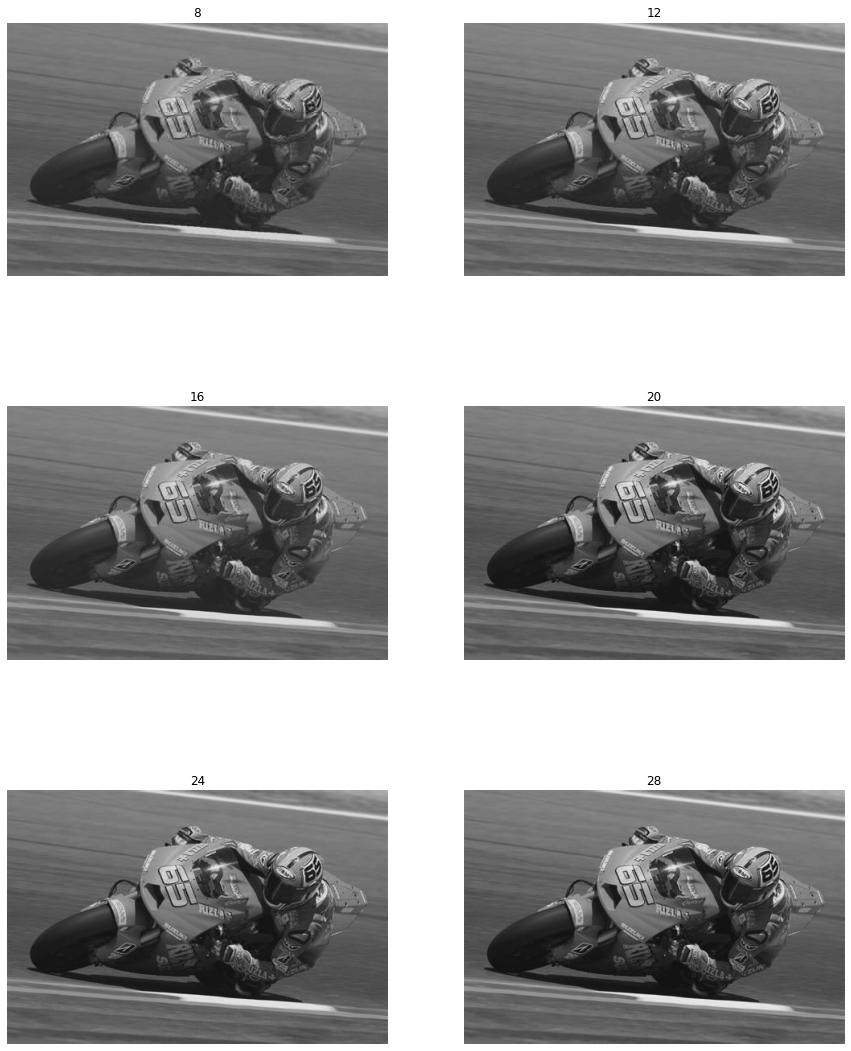

In [110]:
K = [n for n in range(8,32,4)]

images = {}

for k in K:
    images[k] = idct(filter_k_highest(img_dct, k))
    
values = list(images.values())
keys = list(images.keys())
display(values, keys, cmap='gray', figsize=(15, 20))


### 2.1.3 - Create a watermark

In [313]:
k = 32
mu = 0
sigma = 1
alpha = 0.1

w = np.random.default_rng().normal(size=(k,))
print(w)

[ 0.37247779 -0.34416745 -0.35751344  0.10418296 -0.67694893 -0.57370089
  1.2049304   0.23436305 -1.28837004 -0.81732101 -0.85766779  0.62110593
  0.09106277  0.61978308 -1.60090974 -2.35172153 -0.50447517  1.00295503
  0.17769855 -0.66718931  1.03156452  0.48007155  0.03404471 -1.42806367
 -0.74112805  1.29594936  1.2834671   0.06438377 -0.97589939  1.92173314
  1.36444428 -0.45656154]


### 2.1.4 - Embed a Watermark

In [314]:
def watermark_block(block, w):
    oput = np.zeros(block.shape)
    block_abs = np.abs(block)
    
    for w_i in w:
        r, c = np.unravel_index(np.argmax(block_abs, axis=None), block_abs.shape)
        oput[r,c] = block[r,c] * (1 + alpha * w_i)
        block_abs[r,c] = 0;
    
    oput[0,0] = block[0,0]     
    return oput
        
def watermark(img_dct, w, block_size=8):
    oput = np.zeros(img_dct.shape)
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            oput[i:(i + block_size), j:(j + block_size)] = watermark_block(img_dct[i:(i + block_size),j:(j + block_size)], w)
    
    return oput

### 2.1.5 - Create the Watermarked DCT

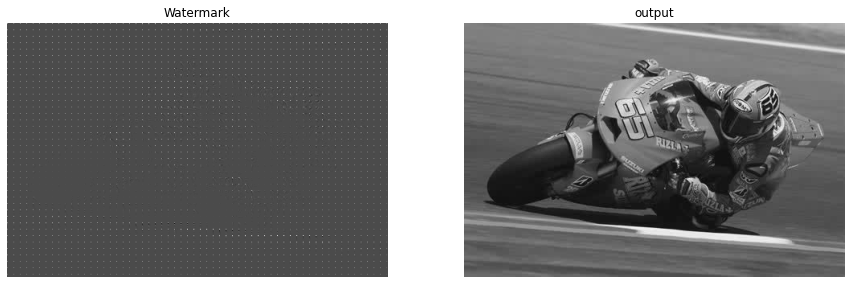

In [315]:
img_w = watermark(img_dct_t, w)

display([img_w, idct(img_w)],['Watermark', 'output'], cmap='gray')

### 2.1.6 - Comparison

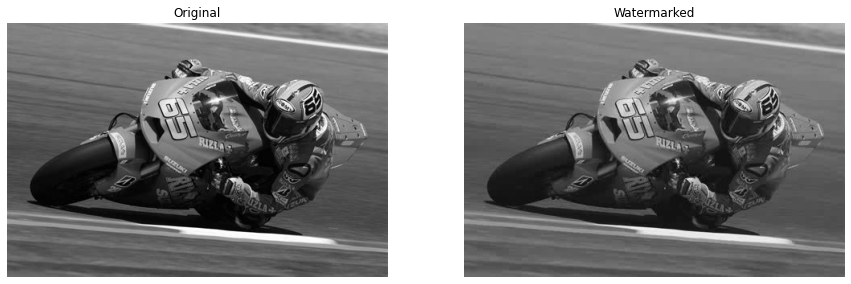

In [316]:
display([img, idct(img_w)], ['Original', 'Watermarked'], cmap='gray')

### 2.1.7 - Histogram

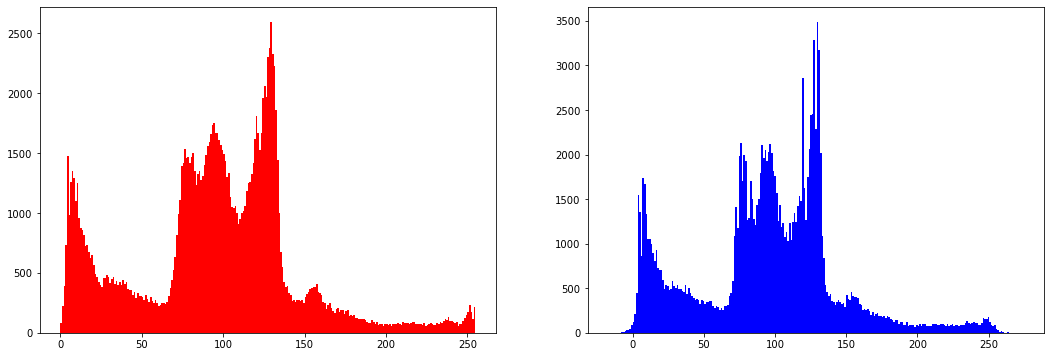

In [317]:
img_flattened = np.reshape(img, (img.shape[0] * img.shape[1],))
w_flattened = np.reshape(idct(img_w), (img_w.shape[0] * img_w.shape[1],))

fig = plt.figure(figsize=(18,6))
fig.add_subplot(1, 2, 1)
plt.hist(img_flattened, bins=255, color='red');
fig.add_subplot(1, 2, 2)
plt.hist(w_flattened, bins=255, color='blue');

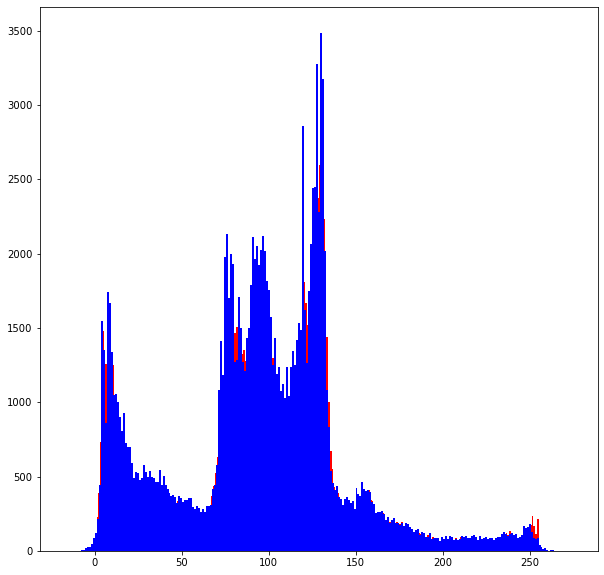

In [318]:
plt.figure(figsize=(10,10))
plt.hist(img_flattened, bins=255, color='red');
plt.hist(w_flattened, bins=255, color='blue');

### 2.1.8 - DC Coefficient
TODO - Explain

## 2.2 - Watermark Detection

### 2.2.1 - Compute the 2D DCT

In [319]:
mystery_1 = img
mystery_2 = idct(img_w)
m1_dct = dct(mystery_1)
m2_dct = dct(mystery_2)

## 2.2.2 - Keep the K largest non-DC coefficients

In [320]:
def remove_DC(img_dct):
    oput = img_dct
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            
            oput[i, j] = 0
    
    return oput

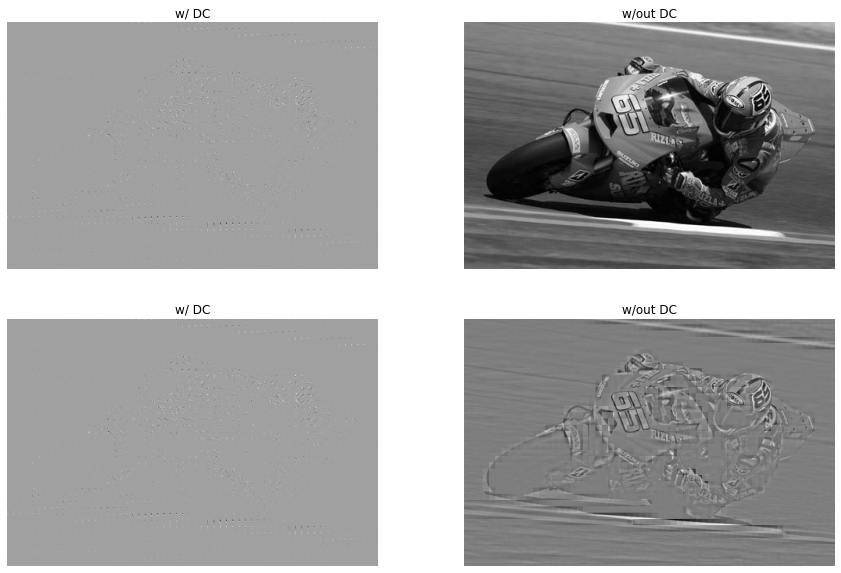

In [321]:
dc_less = remove_DC(m1_dct)
display([m1_dct, mystery_1, dc_less, idct(dc_less)],['w/ DC', 'w/out DC', 'w/ DC', 'w/out DC'], cmap='gray')

In [322]:
m1_dct_filtered = filter_k_highest(m1_dct, k)
m2_dct_filtered = filter_k_highest(m2_dct, k)

In [323]:
def compare_block(c_hat, c, k):
    w_hat = []
    c_hat = np.abs(c_hat)
    c_act = np.abs(c)
    
    c_hat[0, 0] = 0
    
    for i in range(k):
        r, c = np.unravel_index(np.argmax(c_hat, axis=None), c_hat.shape)
        
        denom = (alpha * c_act[r, c])
        numer = (c_hat[r, c] - c_act[r, c])
        
        if denom != 0:
            w_hat.append(numer/denom)
        else:
            w_hat.append(0)
                 
        c_hat[r, c] = 0
              
    return w_hat

In [324]:
def estimate_watermark(img_a, img_b, k, block_size=8):
    w_hat = []
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            
            c_hat = img_a[i:(i + block_size),j:(j + block_size)]
            c = img_b[i:(i + block_size),j:(j + block_size)]
            
            w_i = compare_block(c_hat, c, k)
            w_hat.append(w_i)
    
    return np.asarray(w_hat)

In [327]:
w_hats = estimate_watermark(m1_dct_filtered, m2_dct_filtered, k)
print(w_hats.shape)

np.max(w_hats)

(2400, 32)


1.7932575810148285e+18

In [326]:
w

array([ 0.37247779, -0.34416745, -0.35751344,  0.10418296, -0.67694893,
       -0.57370089,  1.2049304 ,  0.23436305, -1.28837004, -0.81732101,
       -0.85766779,  0.62110593,  0.09106277,  0.61978308, -1.60090974,
       -2.35172153, -0.50447517,  1.00295503,  0.17769855, -0.66718931,
        1.03156452,  0.48007155,  0.03404471, -1.42806367, -0.74112805,
        1.29594936,  1.2834671 ,  0.06438377, -0.97589939,  1.92173314,
        1.36444428, -0.45656154])

## 4.1 - Principal Component Analysis

In [33]:
face_1 = cv2.cvtColor(cv2.imread('images/kid1.jpg'), cv2.COLOR_BGR2RGB)
face_2 = cv2.cvtColor(cv2.imread('images/kid2.jpg'), cv2.COLOR_BGR2RGB)
face_3 = cv2.cvtColor(cv2.imread('images/kid3.jpg'), cv2.COLOR_BGR2RGB)
face_4 = cv2.cvtColor(cv2.imread('images/kid4.jpg'), cv2.COLOR_BGR2RGB)

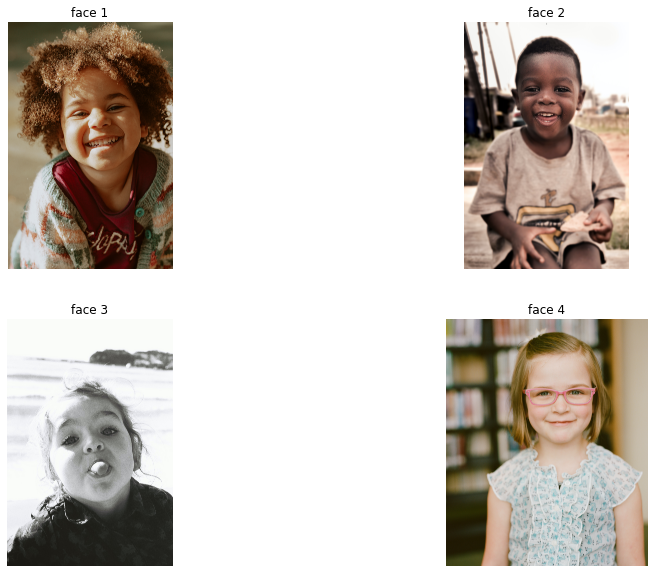

In [34]:
display([face_1, face_2, face_3, face_4],
        ['face 1', 'face 2', 'face 3', 'face 4'])